In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pandas as pd

In [3]:
ds_spei = xr.open_dataset('/home/cccr/msingh/phd_data_cmip_account/spei01.nc').sel(time=slice('1982', '2014'))

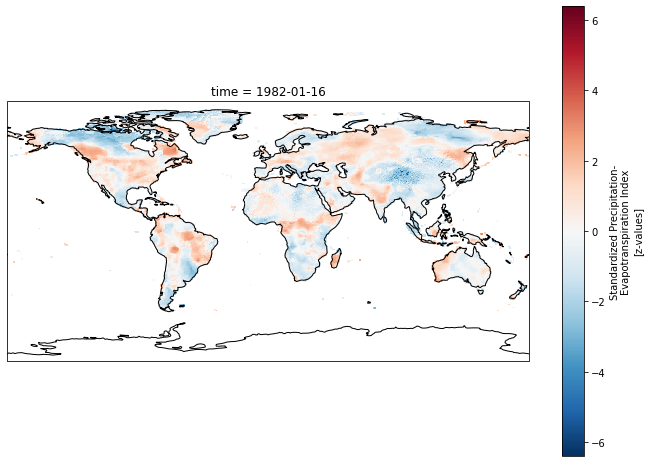

In [4]:
fig,ax = plt.subplots(ncols=1,nrows=1, figsize=(11.69,8.27), subplot_kw={'projection': ccrs.PlateCarree()})
ds_spei.spei.isel(time=0).plot(ax=ax)
ax.coastlines()

In [5]:
ds_spei.spei

<xarray.DataArray 'spei' (time: 396, lat: 360, lon: 720)>
[102643200 values with dtype=float32]
Coordinates:
  * lon      (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float64 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * time     (time) datetime64[ns] 1982-01-16 1982-02-15 ... 2014-12-16
Attributes:
    units:      z-values
    long_name:  Standardized Precipitation-Evapotranspiration Index

In [6]:
ds_spei_ = ds_spei.spei.sel(time=ds_spei.spei.time.dt.month.isin([6,7,8,9,10,11,12])).groupby('time.year').mean('time').sel(lon=slice(60,100)).sel(lat=slice(5,40))

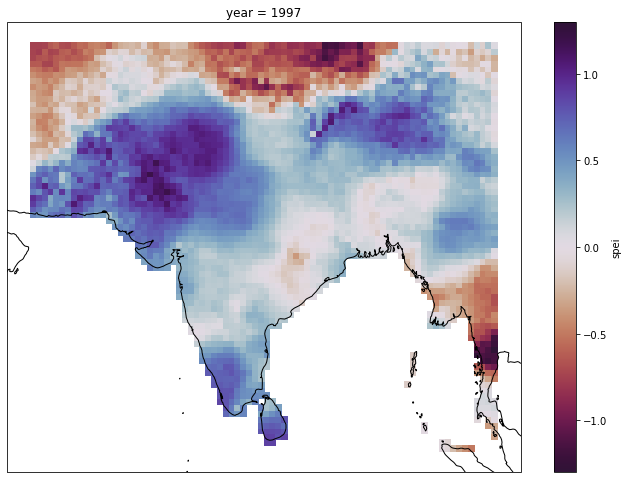

In [7]:
fig,ax = plt.subplots(ncols=1,nrows=1, figsize=(11.69,8.27), subplot_kw={'projection': ccrs.PlateCarree()})
ds_spei_.sel(year=1997).plot(cmap='twilight_shifted_r', ax=ax)
ax.coastlines()

/home/cccr/msingh/anaconda3/envs/phd_obj2_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  
/home/cccr/msingh/anaconda3/envs/phd_obj2_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  


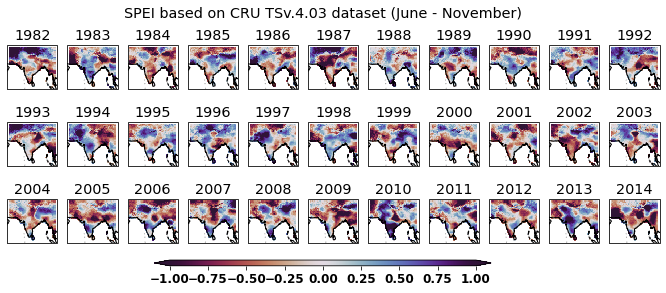

In [91]:
ds_spei_ = ds_spei.spei.sel(time=ds_spei.spei.time.dt.month.isin([6,7,8,9,10,11])).groupby('time.year').mean('time').sel(lon=slice(60,100)).sel(lat=slice(5,40))
fig,ax = plt.subplots(ncols=11,nrows=3, figsize=(11.69,4), subplot_kw={'projection': ccrs.PlateCarree()})
years = np.arange(1982,2015)
cnt = 0
for i_ in range(3):
    for j_ in range(11):
        im = ds_spei_.sel(year=years[cnt]).plot(cmap='twilight_shifted_r', ax=ax[i_,j_], vmin=-1, vmax=1, add_colorbar=False, extend='both')
        ax[i_,j_].coastlines()
        ax[i_,j_].set_title(years[cnt])
        cnt=cnt+1
fig.suptitle('SPEI based on CRU TSv.4.03 dataset (June - November)')
cbar_ax = fig.add_axes([0.3, 0.08, 0.4, 0.02])
cb = fig.colorbar(im, extend='both', cax=cbar_ax, orientation='horizontal')
fig.tight_layout(rect=[0, 0.1, 1, 0.95])

/home/cccr/msingh/anaconda3/envs/phd_obj2_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  
/home/cccr/msingh/anaconda3/envs/phd_obj2_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  


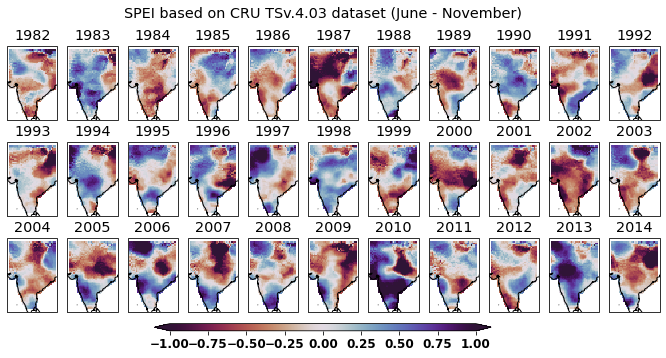

In [93]:
ds_spei_ = ds_spei.spei.sel(time=ds_spei.spei.time.dt.month.isin([6,7,8,9,10,11])).groupby('time.year').mean('time').sel(lon=slice(70,87)).sel(lat=slice(10,35))
fig,ax = plt.subplots(ncols=11,nrows=3, figsize=(11.69,5), subplot_kw={'projection': ccrs.PlateCarree()})
years = np.arange(1982,2015)
cnt = 0
for i_ in range(3):
    for j_ in range(11):
        im = ds_spei_.sel(year=years[cnt]).plot(cmap='twilight_shifted_r', ax=ax[i_,j_], vmin=-1, vmax=1, add_colorbar=False, extend='both')
        ax[i_,j_].coastlines()
        ax[i_,j_].set_title(years[cnt])
        cnt=cnt+1
fig.suptitle('SPEI based on CRU TSv.4.03 dataset (June - November)')
cbar_ax = fig.add_axes([0.3, 0.08, 0.4, 0.02])
cb = fig.colorbar(im, extend='both', cax=cbar_ax, orientation='horizontal')
fig.tight_layout(rect=[0, 0.1, 1, 0.95])
plt.savefig('fig_s1.png', dpi=500)

In [10]:
ds_spei__ = ds_spei.spei.sel(time=ds_spei.spei.time.dt.month.isin([6,7,8,9,10,11])).groupby('time.year').mean('time').sel(lon=slice(70,87)).sel(lat=slice(10,32)).mean(dim='lat').mean(dim='lon')

In [27]:
import matplotlib
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 16}

matplotlib.rc('font', **font)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


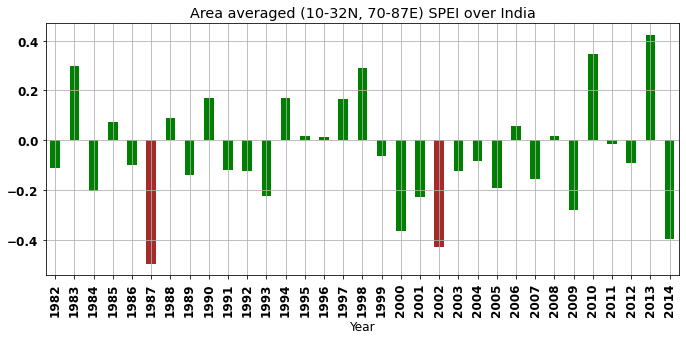

In [89]:
fig, ax = plt.subplots(figsize=(11, 5))

series = ds_spei__.to_series()
# series['positive'] = series.values > 0.0
#data['negative'] = series['values'] < 0.4

series.plot.bar(ax=ax, label='SPEI',  color=np.where(series.values < -0.4, 'brown', 'green'))
plt.grid()
#ax.set_xticklabels(['1982', '1984', '1986', '1988', '1990', '1992', '1994', '1996', '1998', '2000', '2002', '2004', '2006', '2008', '2010', '2012', '2014'])
# plt.legend()
plt.xlabel('Year')
plt.title('Area averaged (10-32N, 70-87E) SPEI over India')
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.15, top=0.85)
plt.savefig('aa_spei.png', dpi=500)

In [30]:
np.arange(1982,2015,2)

array([1982, 1984, 1986, 1988, 1990, 1992, 1994, 1996, 1998, 2000, 2002,
       2004, 2006, 2008, 2010, 2012, 2014])

In [31]:
series.values

array([-0.11226075,  0.29763594, -0.20249233,  0.0739204 , -0.10071015,
       -0.4966065 ,  0.09128972, -0.13816074,  0.17147675, -0.11964753,
       -0.12166794, -0.22276284,  0.17044835,  0.01823468,  0.01194915,
        0.16463192,  0.28885555, -0.06325788, -0.36484003, -0.22721705,
       -0.42937672, -0.12219982, -0.0835976 , -0.19253412,  0.05714681,
       -0.15669066,  0.01732742, -0.28048402,  0.34480932, -0.01616719,
       -0.09276195,  0.42394522, -0.39526755], dtype=float32)

In [94]:
ds_imd = xr.open_dataset('/home/cccr/msingh//data/IMD/imd-dly-p25-1901-2019_anom.nc').sel(time=slice('1982', '2014'))

In [96]:
import matplotlib
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

/home/cccr/msingh/anaconda3/envs/phd_obj2_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  app.launch_new_instance()
/home/cccr/msingh/anaconda3/envs/phd_obj2_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  app.launch_new_instance()


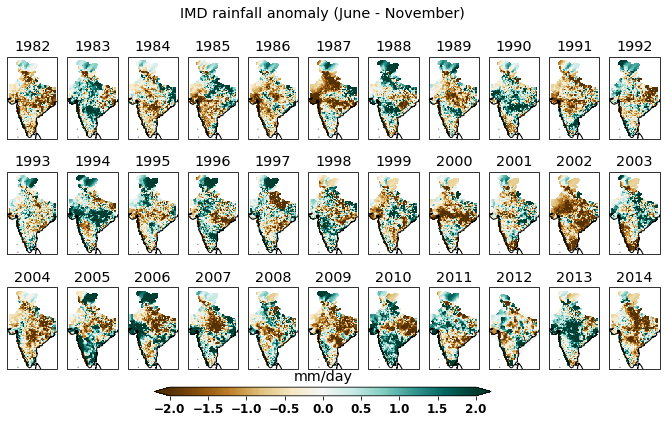

In [100]:
ds_imd_ = ds_imd.rf.sel(time=ds_imd.rf.time.dt.month.isin([6,7,8,9,10,11])).groupby('time.year').mean('time').sel(lon=slice(70,87)).sel(lat=slice(9,37))
fig,ax = plt.subplots(ncols=11,nrows=3, figsize=(11.69,6), subplot_kw={'projection': ccrs.PlateCarree()})
years = np.arange(1982,2015)
cnt = 0
for i_ in range(3):
    for j_ in range(11):
        im = ds_imd_.sel(year=years[cnt]).plot(cmap='BrBG', ax=ax[i_,j_], vmin=-2,vmax=2, add_colorbar=False, extend='both')
        ax[i_,j_].coastlines()
        ax[i_,j_].set_title(years[cnt])
        cnt=cnt+1
fig.suptitle('IMD rainfall anomaly (June - November)')
cbar_ax = fig.add_axes([0.3, 0.08, 0.4, 0.02])
cb = fig.colorbar(im, extend='both', cax=cbar_ax, orientation='horizontal')
cb.ax.set_title('mm/day')

fig.tight_layout(rect=[0, 0.1, 1, 0.95])
plt.savefig('fig_s2.png', dpi=500)

In [34]:
ds_imd__ = ds_imd.rf.sel(time=ds_imd.rf.time.dt.month.isin([6,7,8,9,10,11])).groupby('time.year').mean('time').sel(lon=slice(70,87)).sel(lat=slice(10,32)).mean(dim='lat').mean(dim='lon')

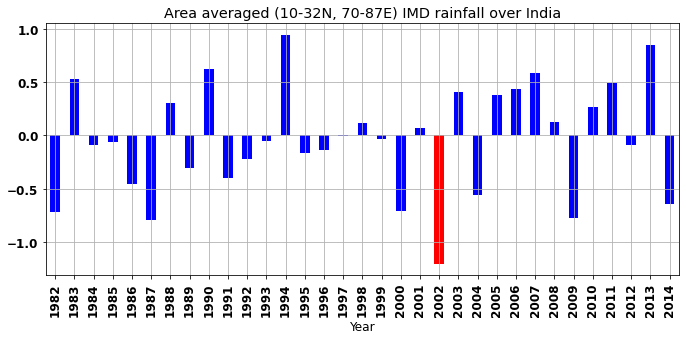

In [90]:
fig, ax = plt.subplots(figsize=(11, 5))

series = ds_imd__.to_series()
# series['positive'] = series.values > 0.0
#data['negative'] = series['values'] < 0.4

series.plot.bar(ax=ax, label='IMD rainfall',  color=np.where(series.values < -1.0, 'r', 'b'))
plt.grid()
plt.xlabel('Year')
# plt.legend()
plt.title('Area averaged (10-32N, 70-87E) IMD rainfall over India')
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.15, top=0.85)
plt.savefig('met_drought.png', dpi=500)

In [41]:
 ds_dust = xr.open_dataset('/home/cccr/msingh/data/merra_aod_global_1980_2020/MERRA2_100.tavg1_2d_aer_Nx.1981_2020_monmean_anom.nc4')

In [42]:
ds_dust.DUEXTTAU

<xarray.DataArray 'DUEXTTAU' (time: 479, lat: 361, lon: 576)>
[99601344 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1981-01-16T12:00:00 1981-02-15 ... 2020-09-16
  * lon      (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
Attributes:
    standard_name:   Dust Extinction AOT [550 nm]
    long_name:       Dust Extinction AOT [550 nm]
    units:           1
    cell_methods:    time: mean
    fmissing_value:  1000000000000000.0
    vmax:            1000000000000000.0
    vmin:            -1000000000000000.0

/home/cccr/msingh/anaconda3/envs/phd_obj2_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  
/home/cccr/msingh/anaconda3/envs/phd_obj2_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  


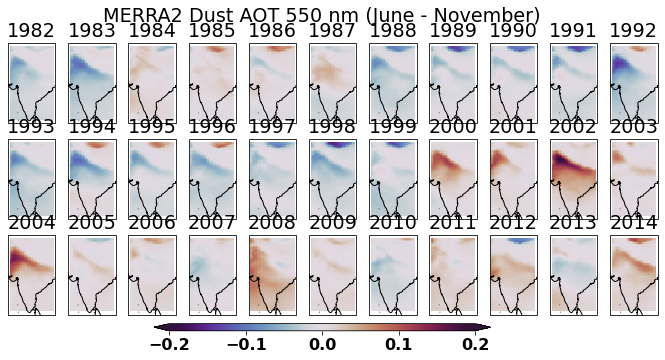

In [43]:
ds_dust_ = ds_dust.DUEXTTAU.sel(time=ds_dust.DUEXTTAU.time.dt.month.isin([6,7,8,9,10,11])).groupby('time.year').mean('time').sel(lon=slice(70,87)).sel(lat=slice(9,38))
fig,ax = plt.subplots(ncols=11,nrows=3, figsize=(11.69,5), subplot_kw={'projection': ccrs.PlateCarree()})
years = np.arange(1982,2015)
cnt = 0
for i_ in range(3):
    for j_ in range(11):
        im = ds_dust_.sel(year=years[cnt]).plot(cmap='twilight_shifted', ax=ax[i_,j_], vmin=-0.2, vmax=0.2, add_colorbar=False, extend='both')
        ax[i_,j_].coastlines()
        ax[i_,j_].set_title(years[cnt])
        cnt=cnt+1
fig.suptitle('MERRA2 Dust AOT 550 nm (June - November)')
cbar_ax = fig.add_axes([0.3, 0.08, 0.4, 0.02])
cb = fig.colorbar(im, extend='both', cax=cbar_ax, orientation='horizontal')
fig.tight_layout(rect=[0, 0.1, 1, 0.95])

Text(0.5, 1.0, 'Area averaged (10-32N, 70-87E) Dust Aerosol Optical Thickness 550 nm over India')

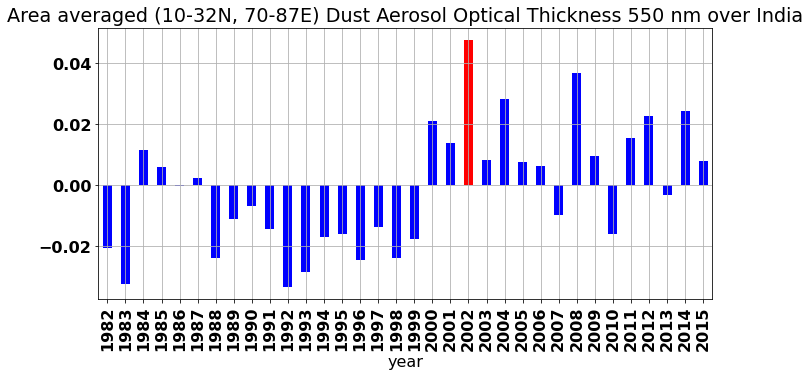

In [44]:
ds_dust__ = ds_dust.DUEXTTAU.sel(time=ds_dust.DUEXTTAU.time.dt.month.isin([6,7,8,9,10,11])).groupby('time.year').mean('time').sel(lon=slice(70,87)).sel(lat=slice(10,32)).mean(dim='lat').mean(dim='lon').sel(year=slice('1982', '2015'))
fig, ax = plt.subplots(figsize=(11, 5))

series = ds_dust__.to_series()
# series['positive'] = series.values > 0.0
#data['negative'] = series['values'] < 0.4

series.plot.bar(ax=ax, label='IMD rainfall',  color=np.where(series.values > 0.04, 'r', 'b'))
plt.grid()
# plt.legend()
plt.title('Area averaged (10-32N, 70-87E) Dust Aerosol Optical Thickness 550 nm over India')

/home/cccr/msingh/anaconda3/envs/phd_obj2_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
/home/cccr/msingh/anaconda3/envs/phd_obj2_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  


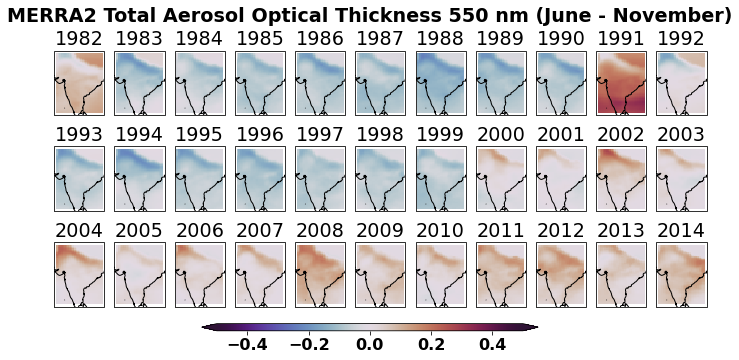

In [47]:
ds_dust_ = ds_dust.TOTEXTTAU.sel(time=ds_dust.TOTEXTTAU.time.dt.month.isin([6,7,8,9,10,11])).groupby('time.year').mean('time').sel(lon=slice(70,87)).sel(lat=slice(10,32))
fig,ax = plt.subplots(ncols=11,nrows=3, figsize=(11.69,5), subplot_kw={'projection': ccrs.PlateCarree()})
years = np.arange(1982,2015)
cnt = 0
for i_ in range(3):
    for j_ in range(11):
        im = ds_dust_.sel(year=years[cnt]).plot(cmap='twilight_shifted', ax=ax[i_,j_], vmin=-0.5, vmax=0.5, add_colorbar=False, extend='both')
        ax[i_,j_].coastlines()
        ax[i_,j_].set_title(years[cnt])
        cnt=cnt+1
fig.suptitle('MERRA2 Total Aerosol Optical Thickness 550 nm (June - November)', weight='bold')
cbar_ax = fig.add_axes([0.3, 0.08, 0.4, 0.02])
cb = fig.colorbar(im, extend='both', cax=cbar_ax, orientation='horizontal')
fig.tight_layout(rect=[0, 0.1, 1, 0.95])

/home/cccr/msingh/anaconda3/envs/phd_obj2_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  
/home/cccr/msingh/anaconda3/envs/phd_obj2_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  


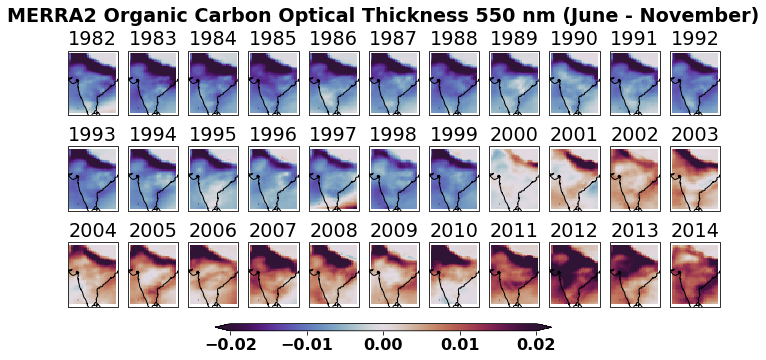

In [48]:
ds_dust_ = ds_dust.OCEXTTAU.sel(time=ds_dust.OCEXTTAU.time.dt.month.isin([6,7,8,9,10,11])).groupby('time.year').mean('time').sel(lon=slice(70,87)).sel(lat=slice(10,32))
fig,ax = plt.subplots(ncols=11,nrows=3, figsize=(11.69,5), subplot_kw={'projection': ccrs.PlateCarree()})
years = np.arange(1982,2015)
cnt = 0
for i_ in range(3):
    for j_ in range(11):
        im = ds_dust_.sel(year=years[cnt]).plot(cmap='twilight_shifted', ax=ax[i_,j_], vmin=-0.02, vmax=0.02,add_colorbar=False, extend='both')
        ax[i_,j_].coastlines()
        ax[i_,j_].set_title(years[cnt])
        cnt=cnt+1
fig.suptitle('MERRA2 Organic Carbon Optical Thickness 550 nm (June - November)', weight='bold')
cbar_ax = fig.add_axes([0.3, 0.08, 0.4, 0.02])
cb = fig.colorbar(im, extend='both', cax=cbar_ax, orientation='horizontal')
fig.tight_layout(rect=[0, 0.1, 1, 0.95])

/home/cccr/msingh/anaconda3/envs/phd_obj2_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  
/home/cccr/msingh/anaconda3/envs/phd_obj2_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  


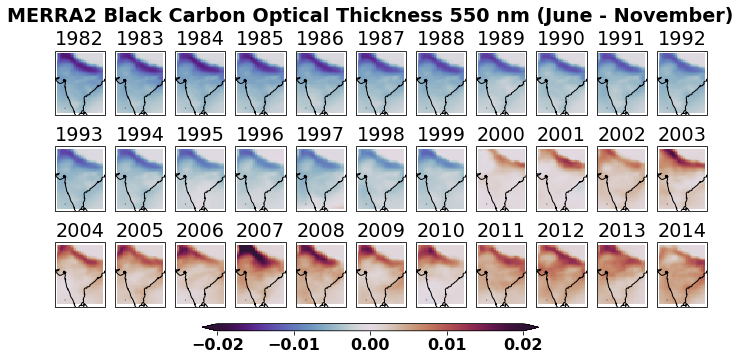

In [49]:
ds_dust_ = ds_dust.BCEXTTAU.sel(time=ds_dust.BCEXTTAU.time.dt.month.isin([6,7,8,9,10,11])).groupby('time.year').mean('time').sel(lon=slice(70,87)).sel(lat=slice(10,32))
fig,ax = plt.subplots(ncols=11,nrows=3, figsize=(11.69,5), subplot_kw={'projection': ccrs.PlateCarree()})
years = np.arange(1982,2015)
cnt = 0
for i_ in range(3):
    for j_ in range(11):
        im = ds_dust_.sel(year=years[cnt]).plot(cmap='twilight_shifted', ax=ax[i_,j_], vmin=-0.02, vmax=0.02,add_colorbar=False, extend='both')
        ax[i_,j_].coastlines()
        ax[i_,j_].set_title(years[cnt])
        cnt=cnt+1
fig.suptitle('MERRA2 Black Carbon Optical Thickness 550 nm (June - November)', weight='bold')
cbar_ax = fig.add_axes([0.3, 0.08, 0.4, 0.02])
cb = fig.colorbar(im, extend='both', cax=cbar_ax, orientation='horizontal')
fig.tight_layout(rect=[0, 0.1, 1, 0.95])

/home/cccr/msingh/anaconda3/envs/phd_obj2_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  
/home/cccr/msingh/anaconda3/envs/phd_obj2_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  


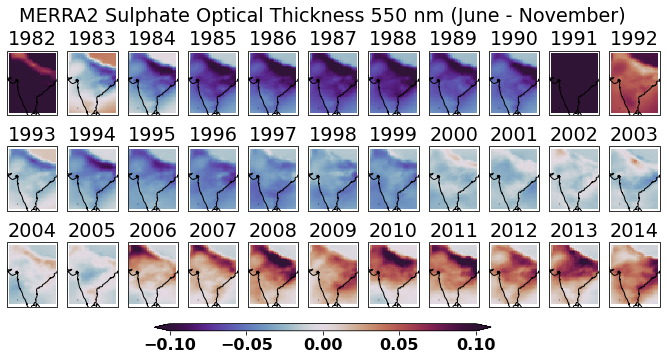

In [50]:
ds_dust_ = ds_dust.SUEXTTAU.sel(time=ds_dust.SUEXTTAU.time.dt.month.isin([6,7,8,9,10,11])).groupby('time.year').mean('time').sel(lon=slice(70,87)).sel(lat=slice(10,32))
fig,ax = plt.subplots(ncols=11,nrows=3, figsize=(11.69,5), subplot_kw={'projection': ccrs.PlateCarree()})
years = np.arange(1982,2015)
cnt = 0
for i_ in range(3):
    for j_ in range(11):
        im = ds_dust_.sel(year=years[cnt]).plot(cmap='twilight_shifted', ax=ax[i_,j_], vmin=-0.1, vmax=0.1,add_colorbar=False, extend='both')
        ax[i_,j_].coastlines()
        ax[i_,j_].set_title(years[cnt])
        cnt=cnt+1
fig.suptitle('MERRA2 Sulphate Optical Thickness 550 nm (June - November)')
cbar_ax = fig.add_axes([0.3, 0.08, 0.4, 0.02])
cb = fig.colorbar(im, extend='both', cax=cbar_ax, orientation='horizontal')
fig.tight_layout(rect=[0, 0.1, 1, 0.95])

/home/cccr/msingh/anaconda3/envs/phd_obj2_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  app.launch_new_instance()
/home/cccr/msingh/anaconda3/envs/phd_obj2_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  app.launch_new_instance()


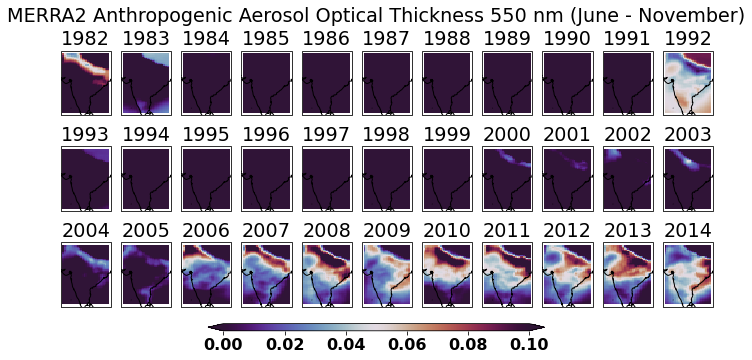

In [51]:
ds_anthrop = ds_dust.SUEXTTAU.sel(time=ds_dust.SUEXTTAU.time.dt.month.isin([6,7,8,9,10,11])).groupby('time.year').mean('time').sel(lon=slice(70,87)).sel(lat=slice(10,32)) + \
ds_dust.BCEXTTAU.sel(time=ds_dust.BCEXTTAU.time.dt.month.isin([6,7,8,9,10,11])).groupby('time.year').mean('time').sel(lon=slice(70,87)).sel(lat=slice(10,32))

fig,ax = plt.subplots(ncols=11,nrows=3, figsize=(11.69,5), subplot_kw={'projection': ccrs.PlateCarree()})
years = np.arange(1982,2015)
cnt = 0
for i_ in range(3):
    for j_ in range(11):
        im = ds_anthrop.sel(year=years[cnt]).plot(vmin=0, vmax=0.1,cmap='twilight_shifted', ax=ax[i_,j_],add_colorbar=False, extend='both')
        ax[i_,j_].coastlines()
        ax[i_,j_].set_title(years[cnt])
        cnt=cnt+1
fig.suptitle('MERRA2 Anthropogenic Aerosol Optical Thickness 550 nm (June - November)')
cbar_ax = fig.add_axes([0.3, 0.08, 0.4, 0.02])
cb = fig.colorbar(im, extend='both', cax=cbar_ax, orientation='horizontal')
fig.tight_layout(rect=[0, 0.1, 1, 0.95])

Text(0.5, 0.98, 'MERRA2 Aerosol Optical Thickness 550 nm anomaly (June - November 2002)')

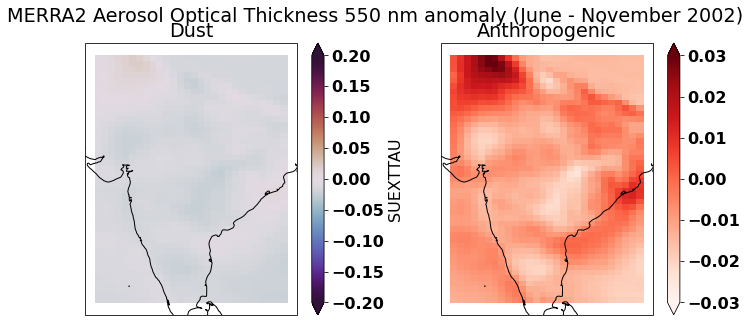

In [52]:
ds_anthrop = ds_dust.SUEXTTAU.sel(time=ds_dust.SUEXTTAU.time.dt.month.isin([6,7,8,9,10,11])).groupby('time.year').mean('time').sel(lon=slice(70,87)).sel(lat=slice(10,32)) + \
ds_dust.BCEXTTAU.sel(time=ds_dust.BCEXTTAU.time.dt.month.isin([6,7,8,9,10,11])).groupby('time.year').mean('time').sel(lon=slice(70,87)).sel(lat=slice(10,32))

fig,ax = plt.subplots(ncols=2,nrows=1, figsize=(11.69,5), subplot_kw={'projection': ccrs.PlateCarree()})
ds_anthrop.sel(year=2002).plot(ax=ax[1], vmin=-0.03, vmax=0.03, extend='both', cmap='Reds')
ds_dust_.sel(year=2002).plot(cmap='twilight_shifted',  vmin=-0.2, vmax=0.2,ax=ax[0], extend='both')

tits_ = ['Dust', 'Anthropogenic']
cnt=0
for ax in [ax[0], ax[1]]:
    ax.coastlines()
    ax.set_title(tits_[cnt])
    cnt=cnt+1
fig.suptitle('MERRA2 Aerosol Optical Thickness 550 nm anomaly (June - November 2002)')

Text(0.5, 1.0, 'MERRA2 (10-32N, 70-87E) Anthropogenic Aerosol Optical Thickness 550 nm over India')

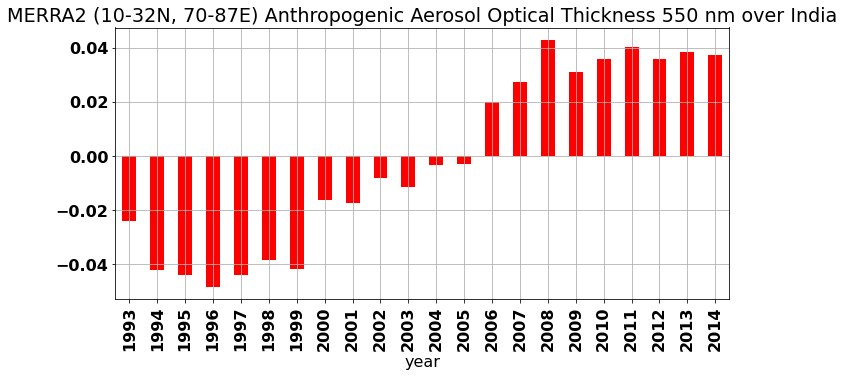

In [53]:
ds_anthrop = ds_dust.SUEXTTAU.sel(time=ds_dust.SUEXTTAU.time.dt.month.isin([6,7,8,9,10,11])).groupby('time.year').mean('time').sel(lon=slice(70,87)).sel(lat=slice(10,32)).mean(dim='lat').mean(dim='lon') + \
ds_dust.BCEXTTAU.sel(time=ds_dust.BCEXTTAU.time.dt.month.isin([6,7,8,9,10,11])).groupby('time.year').mean('time').sel(lon=slice(70,87)).sel(lat=slice(10,32)).mean(dim='lat').mean(dim='lon')

fig, ax = plt.subplots(figsize=(11, 5))

series = ds_anthrop.sel(year=slice('1993', '2014')).to_series()
# series['positive'] = series.values > 0.0
#data['negative'] = series['values'] < 0.4

series.plot.bar(ax=ax,   color='r')
plt.grid()
# plt.legend()
plt.title('MERRA2 (10-32N, 70-87E) Anthropogenic Aerosol Optical Thickness 550 nm over India')

In [54]:
ds_macv2 = xr.open_dataset('/home/cccr/msingh/data/MACv2SP/anthrop_iitmesm_1850_2015_monmean_anom.nc').aod_band10.sel(time=slice(19820101, 20150101))

In [55]:
ds_macv2_ = ds_macv2.copy()
ds_macv2_['time'] = (('time'), pd.to_datetime(ds_macv2.time.values.astype(int).astype(str), format='%Y%m%d'))

/home/cccr/msingh/anaconda3/envs/phd_obj2_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  del sys.path[0]
/home/cccr/msingh/anaconda3/envs/phd_obj2_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  del sys.path[0]


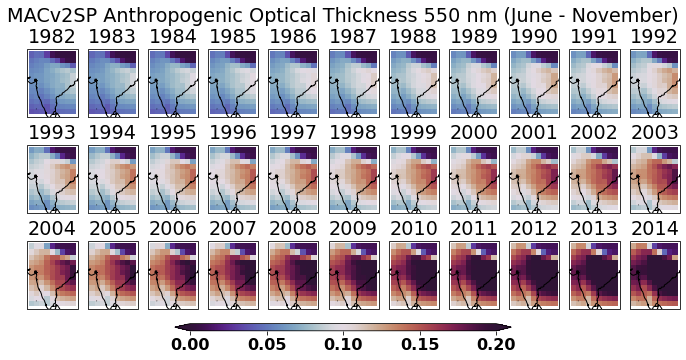

In [56]:
fig,ax = plt.subplots(ncols=11,nrows=3, figsize=(11.69,5), subplot_kw={'projection': ccrs.PlateCarree()})
years = np.arange(1982,2015)
cnt = 0
for i_ in range(3):
    for j_ in range(11):
        im = ds_macv2_.sum(dim='levs').sel(time=ds_macv2_.time.dt.month.isin([6,7,8,9,10,11])).sel(lon=slice(70,87)).sel(lat=slice(10,32)).sel(time=slice(str(years[cnt]),str(years[cnt]))).mean('time').plot(cmap='twilight_shifted', vmin=0, vmax=0.2,ax=ax[i_,j_],add_colorbar=False, extend='both')
        ax[i_,j_].coastlines()
        ax[i_,j_].set_title(years[cnt])
        cnt=cnt+1
fig.suptitle('MACv2SP Anthropogenic Optical Thickness 550 nm (June - November)')
cbar_ax = fig.add_axes([0.3, 0.08, 0.4, 0.02])
cb = fig.colorbar(im, extend='both', cax=cbar_ax, orientation='horizontal')
fig.tight_layout(rect=[0, 0.1, 1, 0.95])

Text(0.5, 1.0, 'MACv2SP (10-32N, 70-87E) Anthropogenic Aerosol Optical Thickness 550 nm over India')

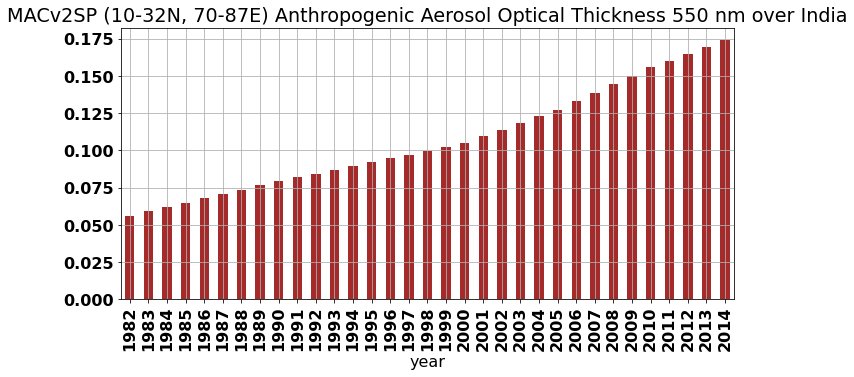

In [57]:
ds_macv2__ = ds_macv2_.sel(time=ds_macv2_.time.dt.month.isin([6,7,8,9,10,11])).groupby('time.year').mean('time').sel(lon=slice(70,87)).sel(lat=slice(10,32)).mean(dim='lat').mean(dim='lon').sum(dim='levs')
fig, ax = plt.subplots(figsize=(11, 5))

series = ds_macv2__.to_series()
# series['positive'] = series.values > 0.0
#data['negative'] = series['values'] < 0.4

series.plot.bar(ax=ax,   color='brown')
plt.grid()
# plt.legend()
plt.title('MACv2SP (10-32N, 70-87E) Anthropogenic Aerosol Optical Thickness 550 nm over India')

In [58]:
# ds_macv2_.sum(dim='levs').sel(time=ds_macv2_.time.dt.month.isin([6,7,8,9,10,11])).sel(time=slice(str(years[cnt]),str(years[cnt])))

In [59]:
# June to November
# Start with the time series of SPEI
# Spatial map of rainfall and SPEI for 2002 June - September - put 1987 in supplementary - tell it was mostly in NW part - 2002 was in core monsoon region which is the region of land-atmosphere coupling(makes it interesting) and 1987 was over northwestern region, 
# Show the map of AOD dust + anthropogenic for 2002 also show the soil moisture from GLDAS data

In [60]:
ds_soil_mois = xr.open_mfdataset('/home/cccr/msingh/data/GLEAM_vegetation/SMsurf_*.nc', concat_dim='time').resample(time='m').mean()
ds_soil_mois_anom = ds_soil_mois.groupby('time.month')- ds_soil_mois.groupby('time.month').mean(dim='time')
ds_soil_mois_anom_ = ds_soil_mois_anom.transpose("time", "lat", "lon")

/home/cccr/msingh/anaconda3/envs/phd_obj2_analysis/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


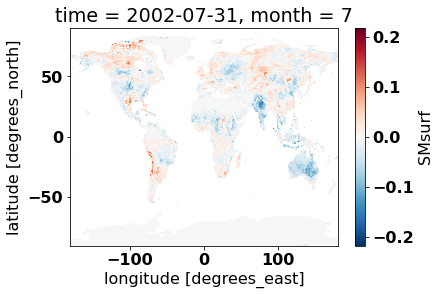

In [61]:
ds_soil_mois_anom_.sel(time='2002-07').SMsurf.plot()

In [62]:
ds_anthrop = ds_dust.SUEXTTAU.sel(time=ds_dust.SUEXTTAU.time.dt.month.isin([6,7,8,9,10,11])).groupby('time.year').mean('time').sel(lon=slice(70,87)).sel(lat=slice(9,38)) + \
ds_dust.BCEXTTAU.sel(time=ds_dust.BCEXTTAU.time.dt.month.isin([6,7,8,9,10,11])).groupby('time.year').mean('time').sel(lon=slice(70,87)).sel(lat=slice(9,38))

ds_soil_mois_anom__ = ds_soil_mois_anom_.SMsurf.sel(time=ds_soil_mois_anom_.SMsurf.time.dt.month.isin([6,7,8,9,10,11])).groupby('time.year').mean('time').sel(lon=slice(70,87)).sel(lat=slice(38,9))

/home/cccr/msingh/anaconda3/envs/phd_obj2_analysis/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Text(0.5, 0.98, 'June - November 2002')

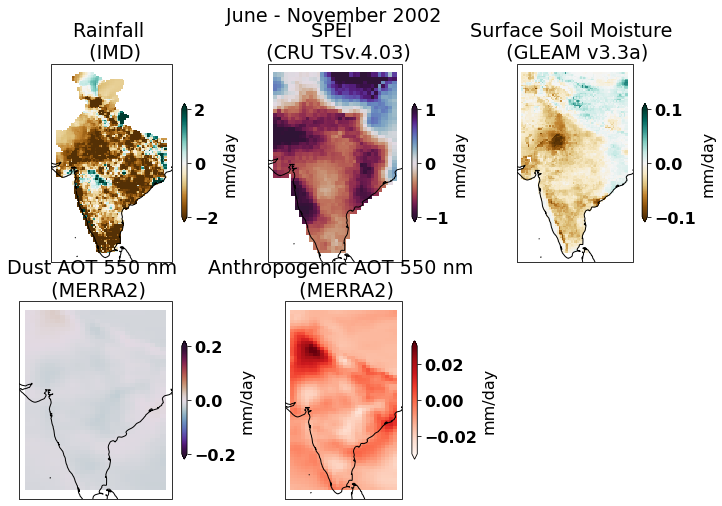

In [63]:
fig,ax = plt.subplots(ncols=3,nrows=2, figsize=(11.69,8), subplot_kw={'projection': ccrs.PlateCarree()})
fig.delaxes(ax[1,2])
ds_anthrop.sel(year=2002).plot(ax=ax[1,1], vmin=-0.03, vmax=0.03, extend='both', cmap='Reds', \
                              cbar_kwargs = { 'shrink':0.6,  'label':'mm/day'})
ds_dust_.sel(year=2002).plot(cmap='twilight_shifted',  vmin=-0.2, vmax=0.2,ax=ax[1,0], extend='both', \
                            cbar_kwargs = { 'shrink':0.6,  'label':'mm/day'})
ds_soil_mois_anom__.sel(year=2002).plot(cmap='BrBG',  vmin=-0.1, vmax=0.1,ax=ax[0,2], extend='both', \
                                       cbar_kwargs = { 'shrink':0.6,  'label':'mm/day'})
ds_imd_.sel(year=2002).plot(cmap='BrBG', ax=ax[0,0], vmin=-2,vmax=2,extend='both', \
                           cbar_kwargs = { 'shrink':0.6,  'label':'mm/day'})

ds_spei_.sel(year=2002).plot(cmap='twilight_shifted_r', ax=ax[0,1], vmin=-1, vmax=1, extend='both', \
                                  cbar_kwargs = { 'shrink':0.6,  'label':'mm/day'})

tits_ = ['Rainfall \n (IMD)','SPEI \n (CRU TSv.4.03)',  'Surface Soil Moisture \n (GLEAM v3.3a)', 'Dust AOT 550 nm \n (MERRA2)', 'Anthropogenic AOT 550 nm \n (MERRA2)', ]
cnt=0
for ax in [ax[0,0], ax[0,1], ax[0,2], ax[1,0], ax[1,1]]:
    ax.coastlines()
    ax.set_title(tits_[cnt])
    cnt=cnt+1

fig.suptitle('June - November 2002')

In [64]:
ds_soil_mois_anom_.SMsurf.sel(time=ds_soil_mois_anom_.SMsurf.time.dt.month.isin([6,7,8,9,10,11])).groupby('time.year')

DataArrayGroupBy, grouped over 'year' 
39 groups with labels 1980, 1981, 1982, ..., 2017, 2018.

In [65]:
ds_fldas = xr.open_dataset('/home/cccr/msingh/data/fldas_land_monthly_nasa_1982_2020/FLDAS_NOAH01_C_GL_M.A_1982_2020.nc').SoilMoi00_10cm_tavg
ds_fldas_anom = ds_fldas.groupby('time.month')- ds_fldas.groupby('time.month').mean(dim='time')

In [66]:
ds_fldas_anom_ = ds_fldas_anom.sel(time=ds_fldas_anom.time.dt.month.isin([6,7,8,9,10,11])).groupby('time.year').mean('time').sel(X=slice(70,87)).sel(Y=slice(10,32))

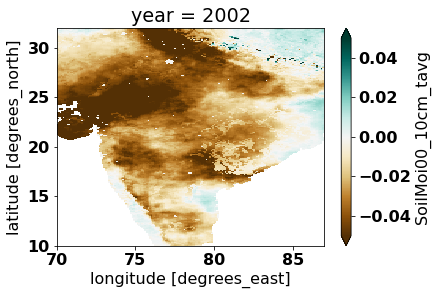

In [67]:
ds_fldas_anom_.sel(year=2002).plot(cmap='BrBG', vmin=-0.05, vmax=0.05)

In [68]:
ds_gldas = xr.open_mfdataset('/home/cccr/msingh/data/gldas_land_monthly_1948_2015/GLDAS_NOAH025*', concat_dim='time').SoilMoi0_10cm_inst

In [69]:
ds_gldas_anom = ds_gldas.groupby('time.month')- ds_gldas.groupby('time.month').mean(dim='time')
ds_gldas_anom_ = ds_gldas_anom.sel(time=ds_gldas_anom.time.dt.month.isin([6,7,8,9,10,11])).groupby('time.year').mean('time').sel(lon=slice(70,87)).sel(lat=slice(9,38))/30

/home/cccr/msingh/anaconda3/envs/phd_obj2_analysis/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


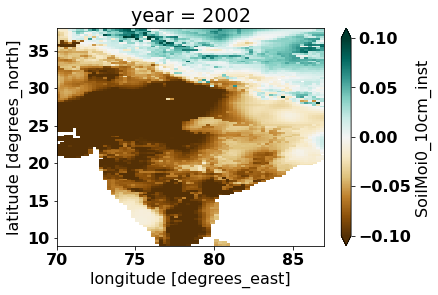

In [70]:
ds_gldas_anom_.sel(year=2002).plot(cmap='BrBG', vmin=-0.1, vmax=0.1)

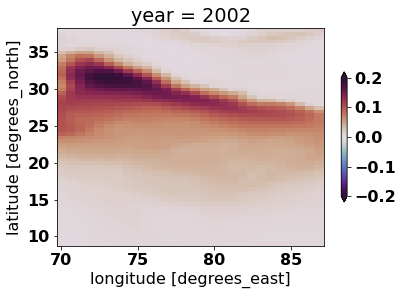

In [71]:
ds_dust_ = ds_dust.DUEXTTAU.sel(time=ds_dust.SUEXTTAU.time.dt.month.isin([6,7,8,9,10,11])).groupby('time.year').mean('time').sel(lon=slice(70,87)).sel(lat=slice(9,38))
ds_dust_.sel(year=2002).plot(cmap='twilight_shifted',  vmin=-0.2, vmax=0.2, extend='both', \
                            cbar_kwargs = { 'shrink':0.6,  'label':''})

In [75]:
ds_dust_anthrop_ = ds_dust.DUEXTTAU.sel(time=ds_dust.SUEXTTAU.time.dt.month.isin([6,7,8,9,10,11])).groupby('time.year').mean('time').sel(lon=slice(70,87)).sel(lat=slice(9,38)) + \
ds_dust.SUEXTTAU.sel(time=ds_dust.SUEXTTAU.time.dt.month.isin([6,7,8,9,10,11])).groupby('time.year').mean('time').sel(lon=slice(70,87)).sel(lat=slice(9,38)) + \
ds_dust.BCEXTTAU.sel(time=ds_dust.SUEXTTAU.time.dt.month.isin([6,7,8,9,10,11])).groupby('time.year').mean('time').sel(lon=slice(70,87)).sel(lat=slice(9,38))

In [79]:
import matplotlib
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

/home/cccr/msingh/anaconda3/envs/phd_obj2_analysis/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


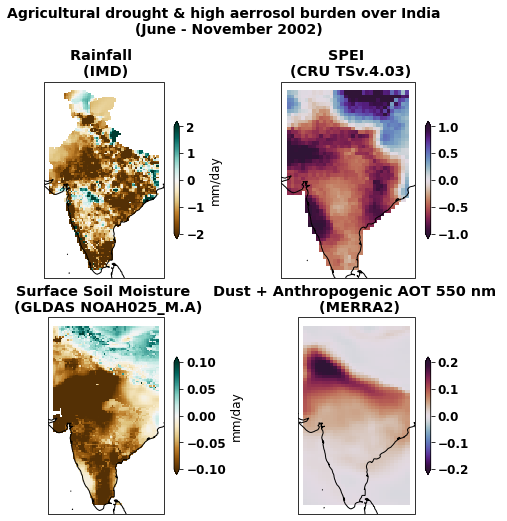

In [86]:
fig,ax = plt.subplots(ncols=2,nrows=2, figsize=(8,8), subplot_kw={'projection': ccrs.PlateCarree()})

# ds_anthrop.sel(year=2002).plot(ax=ax[1,1], vmin=-0.03, vmax=0.03, extend='both', cmap='Reds', \
#                               cbar_kwargs = { 'shrink':0.6,  'label':'mm/day'})
ds_dust_anthrop_.sel(year=2002).plot(cmap='twilight_shifted',  vmin=-0.2, vmax=0.2,ax=ax[1,1], extend='both', \
                            cbar_kwargs = { 'shrink':0.6,  'label':''})
ds_gldas_anom_.sel(year=2002).plot(cmap='BrBG',  vmin=-0.1, vmax=0.1,ax=ax[1,0], extend='both', \
                                       cbar_kwargs = { 'shrink':0.6,  'label':'mm/day'})
ds_imd_.sel(year=2002).plot(cmap='BrBG', ax=ax[0,0], vmin=-2,vmax=2,extend='both', \
                           cbar_kwargs = { 'shrink':0.6,  'label':'mm/day'})

ds_spei_.sel(year=2002).plot(cmap='twilight_shifted_r', ax=ax[0,1], vmin=-1, vmax=1, extend='both', \
                                  cbar_kwargs = { 'shrink':0.6,  'label':''})

tits_ = ['Rainfall \n (IMD)','SPEI \n (CRU TSv.4.03)',  'Surface Soil Moisture \n (GLDAS NOAH025_M.A)', 'Dust + Anthropogenic AOT 550 nm \n (MERRA2)']
cnt=0
for ax in [ax[0,0], ax[0,1], ax[1,0], ax[1,1]]:
    ax.coastlines()
    ax.set_title(tits_[cnt], weight='bold')
    cnt=cnt+1

fig.suptitle('Agricultural drought & high aerrosol burden over India \n (June - November 2002)',fontsize=14, weight='bold')
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.85)
plt.savefig('ag_drought_dust_sm.png', dpi=500)

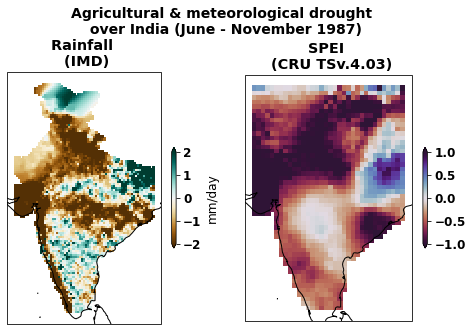

In [88]:
fig,ax = plt.subplots(ncols=2,nrows=1, figsize=(8,5), subplot_kw={'projection': ccrs.PlateCarree()})

# ds_anthrop.sel(year=2002).plot(ax=ax[1,1], vmin=-0.03, vmax=0.03, extend='both', cmap='Reds', \
#                               cbar_kwargs = { 'shrink':0.6,  'label':'mm/day'})
# ds_dust_anthrop_.sel(year=2002).plot(cmap='twilight_shifted',  vmin=-0.2, vmax=0.2,ax=ax[1,1], extend='both', \
#                             cbar_kwargs = { 'shrink':0.6,  'label':''})
# ds_gldas_anom_.sel(year=2002).plot(cmap='BrBG',  vmin=-0.1, vmax=0.1,ax=ax[1,0], extend='both', \
#                                        cbar_kwargs = { 'shrink':0.6,  'label':'mm/day'})
ds_imd_.sel(year=1987).plot(cmap='BrBG', ax=ax[0], vmin=-2,vmax=2,extend='both', \
                           cbar_kwargs = { 'shrink':0.4,  'label':'mm/day'})

ds_spei_.sel(year=1987).plot(cmap='twilight_shifted_r', ax=ax[1], vmin=-1, vmax=1, extend='both', \
                                  cbar_kwargs = { 'shrink':0.4,  'label':''})

tits_ = ['Rainfall \n (IMD)','SPEI \n (CRU TSv.4.03)']
cnt=0
for ax in [ax[0], ax[1]]:
    ax.coastlines()
    ax.set_title(tits_[cnt], weight='bold')
    cnt=cnt+1

#fig.suptitle('(June - November 1987)',fontsize=14, weight='bold')

fig.suptitle('Agricultural & meteorological drought \n over India (June - November 1987)',fontsize=14, weight='bold')
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.8)
plt.savefig('agmet_drought_1987.png', dpi=500)